In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as int

# Algorithm

In [19]:
# Weights
# Repulsiveness between of robots
C1 = 1

# Repulsiveness of obstacles
C2 = 2

# Robots
robot1_start = (1,0)
robot1_end = (5,5)
robot2_start = (5,-2)
robot2_end = (1.5,6)
robot3_start = (8,-3)
robot3_end = (-1,6)

# Obstacles
obs1_radius = 1
obs1_pos = (5,1)
obs2_radius = 1
obs2_pos = (2,4)

# Guess
robot1_x = 5
robot1_y = 5
robot2_x = 8
robot2_y = 6
robot3_x = 2
robot3_y = 6

def dxydt(t, x_y):
    x1, y1, x2, y2, x3, y3, dx1, dy1, dx2, dy2, dx3, dy3 = x_y

    x1_el = - C1 * (x1 - x2) / ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 2 - C1 * (x1 - x3) / ((x1 - x3) ** 2 + (y1 - y3) ** 2) ** 2 - C2 * (x1 - obs1_pos[0]) / (np.sqrt((x1 - obs1_pos[0]) ** 2 + (y1 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x1 - obs1_pos[0]) ** 2 + (y1 - obs1_pos[1]) ** 2) - C2 * (x1 - obs2_pos[0]) / (np.sqrt((x1 - obs2_pos[0]) ** 2 + (y1 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x1 - obs2_pos[0]) ** 2 + (y1 - obs2_pos[1]) ** 2)

    y1_el = - C1 * (y1 - y2) / ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 2 - C1 * (y1 - y3) / ((x1 - x3) ** 2 + (y1 - y3) ** 2) ** 2 - C2 * (y1 - obs1_pos[1]) / (np.sqrt((x1 - obs1_pos[0]) ** 2 + (y1 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x1 - obs1_pos[0]) ** 2 + (y1 - obs1_pos[1]) ** 2) - C2 * (y1 - obs2_pos[1]) / (np.sqrt((x1 - obs2_pos[0]) ** 2 + (y1 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x1 - obs2_pos[0]) ** 2 + (y1 - obs2_pos[1]) ** 2)

    x2_el = C1 * (x1 - x2) / ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 2 - C1 * (x2 - x3) / ((x2 - x3) ** 2 + (y2 - y3) ** 2) ** 2 - C2 * (x2 - obs1_pos[0]) / (np.sqrt((x2 - obs1_pos[0]) ** 2 + (y2 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x2 - obs1_pos[0]) ** 2 + (y2 - obs1_pos[1]) ** 2) - C2 * (x2 - obs2_pos[0]) / (np.sqrt((x2 - obs2_pos[0]) ** 2 + (y2 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x2 - obs2_pos[0]) ** 2 + (y2 - obs2_pos[1]) ** 2)

    y2_el = C1 * (y1 - y2) / ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 2 - C1 * (y2 - y3) / ((x2 - x3) ** 2 + (y2 - y3) ** 2) ** 2 - C2 * (y2 - obs1_pos[1]) / (np.sqrt((x2 - obs1_pos[0]) ** 2 + (y2 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x2 - obs1_pos[0]) ** 2 + (y2 - obs1_pos[1]) ** 2) - C2 * (y2 - obs2_pos[1]) / (np.sqrt((x2 - obs2_pos[0]) ** 2 + (y2 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x2 - obs2_pos[0]) ** 2 + (y2 - obs2_pos[1]) ** 2)

    x3_el = C1 * (x1 - x3) / ((x1 - x3) ** 2 + (y1 - y3) ** 2) ** 2 + C1 * (x2 - x3) / ((x2 - x3) ** 2 + (y2 - y3) ** 2) ** 2 - C2 * (x3 - obs1_pos[0]) / (np.sqrt((x3 - obs1_pos[0]) ** 2 + (y3 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x3 - obs1_pos[0]) ** 2 + (y3 - obs1_pos[1]) ** 2) - C2 * (x3 - obs2_pos[0]) / (np.sqrt((x3 - obs2_pos[0]) ** 2 + (y3 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x3 - obs2_pos[0]) ** 2 + (y3 - obs2_pos[1]) ** 2)

    y3_el = C1 * (y1 - y3) / ((x1 - x3) ** 2 + (y1 - y3) ** 2) ** 2 + C1 * (y2 - y3) / ((x2 - x3) ** 2 + (y2 - y3) ** 2) ** 2 - C2 * (y3 - obs1_pos[1]) / (np.sqrt((x3 - obs1_pos[0]) ** 2 + (y3 - obs1_pos[1]) ** 2) - obs1_radius) ** 3 / np.sqrt((x3 - obs1_pos[0]) ** 2 + (y3 - obs1_pos[1]) ** 2) - C2 * (y3 - obs2_pos[1]) / (np.sqrt((x3 - obs2_pos[0]) ** 2 + (y3 - obs2_pos[1]) ** 2) - obs2_radius) ** 3 / np.sqrt((x3 - obs2_pos[0]) ** 2 + (y3 - obs2_pos[1]) ** 2)

    return dx1, dy1, dx2, dy2, dx3, dy3, x1_el, y1_el, x2_el, y2_el, x3_el, y3_el

def bc(ya, yb):
    return ya[0] - robot1_start[0], yb[0] - robot1_end[0] , ya[1] - robot1_start[1], yb[1] - robot1_end[1], ya[2] - robot2_start[0], yb[2] - robot2_end[0], ya[3] - robot2_start[1], yb[3] - robot2_end[1], ya[4] - robot3_start[0], yb[4] - robot3_end[0], ya[5] - robot3_start[1], yb[5] - robot3_end[1]

t_guess = np.linspace(0, 1, 10)
xy_guess = np.zeros((12, t_guess.size))

xy_guess[0] = robot1_x
xy_guess[1] = robot1_y
xy_guess[2] = robot2_x
xy_guess[3] = robot2_y
xy_guess[4] = robot3_x
xy_guess[5] = robot3_y
res = int.solve_bvp(dxydt, bc, t_guess, xy_guess)

# Models

## Paths of robots

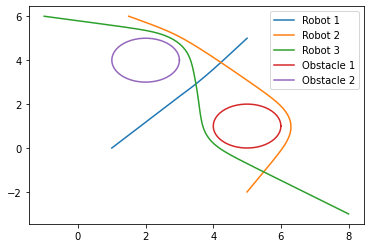

In [20]:
t = np.linspace(0, 1, 201)
obs_t = np.linspace(0, 2 * np.pi, 51)
plt.plot(res.sol(t)[0], res.sol(t)[1], label = 'Robot 1')
plt.plot(res.sol(t)[2], res.sol(t)[3], label = 'Robot 2')
plt.plot(res.sol(t)[4], res.sol(t)[5], label = 'Robot 3')
plt.plot(obs1_radius * np.cos(obs_t) + obs1_pos[0], obs1_radius * np.sin(obs_t) + obs1_pos[1], label = 'Obstacle 1')
plt.plot(obs2_radius * np.cos(obs_t) + obs2_pos[0], obs2_radius * np.sin(obs_t) + obs2_pos[1], label = 'Obstacle 2')
plt.legend()

## Verification of collision-free

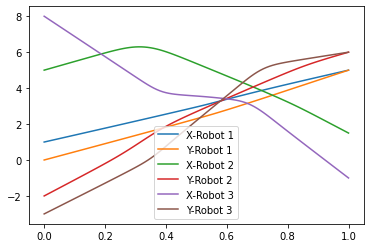

In [21]:
t = np.linspace(0, 1, 101)
plt.plot(t, res.sol(t)[0], label = 'X-Robot 1')
plt.plot(t, res.sol(t)[1], label = 'Y-Robot 1')
plt.plot(t, res.sol(t)[2], label = 'X-Robot 2')
plt.plot(t, res.sol(t)[3], label = 'Y-Robot 2')
plt.plot(t, res.sol(t)[4], label = 'X-Robot 3')
plt.plot(t, res.sol(t)[5], label = 'Y-Robot 3')
plt.legend()